This file (along with statistical_inference_2) was used to evaluate the performance of the model.

In [84]:
import pandas as pd
from tqdm.auto import tqdm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [85]:
certain = pd.read_excel('certain.xlsx', index_col=0)
uncertain = pd.read_excel('uncertain.xlsx', index_col=0)

In [19]:
len(certain), (len(certain) / (len(certain)+len(uncertain)))

(6581, 0.727262680959222)

In [20]:
corr = certain[(certain['target'] == certain['predicted'])]
print('correct predictions', len(corr))
print(len(corr)/(len(certain))*100, '%')

correct predictions 5904
89.71280960340374 %


In [21]:
wrong = certain[(certain['target'] != certain['predicted'])]
print('incorrect predictions', len(corr))
print(len(wrong)/(len(certain))*100, '%')

incorrect predictions 5904
10.287190396596262 %


In [22]:
uncert = wrong[wrong['score'] < 0.9]
print(len(uncert)/len(wrong)*100, '%')

77.84342688330872 %


In [23]:
certain

,error,target,general,general score,predicted,score
0,describe → shows,lex_item_choice,lexical,0.956233,lex_item_choice,0.997626
1,some → same,lex_item_choice,lexical,0.959264,lex_item_choice,0.997089
2,spend → spends,Agreement_errors,gram,0.991375,Agreement_errors,0.890907
3,on → by,Prepositions,gram,0.993361,Prepositions,0.987815
4,the 2012 → 2012,Numerals,gram,0.918879,Numerals,0.927539
...,...,...,...,...,...,...
6624,around → nearly,lex_item_choice,lexical,0.956145,lex_item_choice,0.996367
6625,is → is so,Absence_comp_sent,discourse,0.972368,Absence_comp_sent,0.929098
6626,It's → It is,Inappropriate_register,discourse,0.935128,Inappropriate_register,0.984939
6627,not → but not,Linking_device,discourse,0.917909,Linking_device,0.569385


In [24]:
uncertain.head()

,error,target,lexical gen,discourse gen,grammar gen,lexical pred,lexical score,discourse pred,discourse score,grammar pred,grammar score,disc likelihood,grammar likelihood,lexical likelihood,candidate class,candidate prob,candidate
0,your → their,lex_item_choice,0.164938,0.729123,0.105939,lex_item_choice,0.997255,Ref_device,0.745855,Agreement_errors,0.932342,0.543820,0.098772,0.164485,disc likelihood,0.543820,Ref_device
1,female → a woman,Category_confusion,0.266614,0.036804,0.696582,lex_item_choice,0.992719,Absence_comp_sent,0.965378,Category_confusion,0.924602,0.035530,0.644061,0.264673,grammar likelihood,0.644061,Category_confusion
2,Overall → To begin witn,Linking_device,0.144234,0.829401,0.026365,lex_item_choice,0.993860,Linking_device,0.921985,Prepositions,0.338247,0.764696,0.008918,0.143349,disc likelihood,0.764696,Linking_device
3,overweight → obesity,lex_item_choice,0.158298,0.002769,0.838933,lex_item_choice,0.998287,Inappropriate_register,0.859368,Category_confusion,0.512750,0.002379,0.430163,0.158027,grammar likelihood,0.430163,Category_confusion
4,have declined → saw a decline in,Voice,0.173144,0.036168,0.790687,lex_item_choice,0.987587,Absence_comp_sent,0.672624,Verb_pattern,0.437023,0.024328,0.345548,0.170995,grammar likelihood,0.345548,Verb_pattern


Distribution of general class certainty:

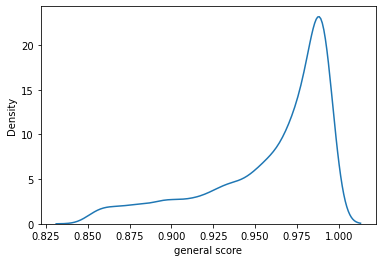

In [27]:
fig, ax = plt.subplots()
sns.kdeplot(certain['general score'])
plt.show()

Distribution of final tag score for errors with 'certain' general class:

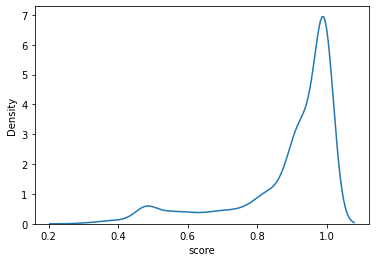

In [28]:
fig, ax = plt.subplots()
sns.kdeplot(certain['score'])
plt.show()

Distribution of final tag score for errors with 'uncertain' general class:

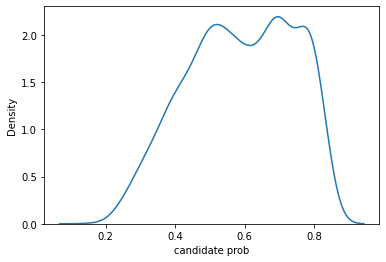

In [37]:
fig, ax = plt.subplots()
sns.kdeplot(uncertain['candidate prob'])
plt.show()

In [87]:
certain_treshold = 0.7
uncertain_treshold = 0.63

In [73]:
def plot_pie_chart(certain_treshold, uncertain_treshold):  
    print(certain_treshold, uncertain_treshold)
    total_predictions = len(certain[certain['score'] > certain_treshold]) + len(uncertain[uncertain['candidate prob'] > uncertain_treshold])
    print(f'{total_predictions} total predictions, out of {len(certain)+len(uncertain)}, {total_predictions/(len(certain)+len(uncertain))*100} %')
    correct_predictions = len(certain[(certain['score'] > certain_treshold) & (certain['target'] == certain['predicted'])]) + len(uncertain[(uncertain['candidate prob'] > uncertain_treshold) & (uncertain['candidate'] == uncertain['target'])])
    print(f'of them {correct_predictions} correct, {correct_predictions/(len(certain)+len(uncertain))*100} %')
    print(f"uncertain predictions accepted {len(uncertain[uncertain['candidate prob'] > uncertain_treshold])}")
    print(f"of them correct {len(uncertain[(uncertain['candidate prob'] > uncertain_treshold) & (uncertain['candidate'] == uncertain['target'])])}")

    fix, ax = plt.subplots(figsize=(7,7))
    ax.pie([correct_predictions, total_predictions-correct_predictions, len(certain)+len(uncertain)-total_predictions],
           labels=['Correct', 'Incorrect', 'Uncertain'],
           colors=['g', 'r', 'lightblue'],
           autopct='%1.1f%%',
           textprops={'fontsize': 14,
                      'fontname': 'Times New Roman'})

    plt.savefig('finished_pipeline_pc.png')
    plt.show()


Pie chart for the final threshold values that were reported in the paper:

0.7 0.63
6787 total predictions, out of 9049, 75.00276273621395 %
of them 6182 correct, 68.31694109846393 %
uncertain predictions accepted 1076
of them correct 809


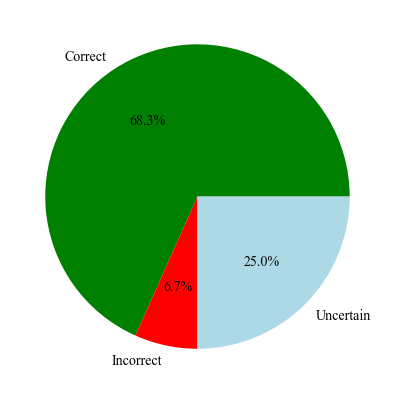

In [76]:
plot_pie_chart(0.7, 0.63)

For comparison: pie chart if we accept all judgments with 'certain' general class (p_one class = 0, p_three classes = 0.63):

0.0 0.63
7657 total predictions, out of 9049, 84.61708476074705 %
of them 6713 correct, 74.18499281688584 %
uncertain predictions accepted 1076
of them correct 809


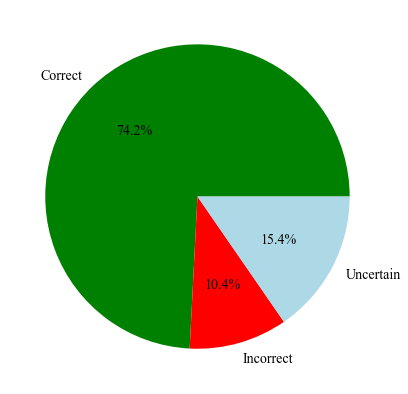

In [77]:
plot_pie_chart(0.0, 0.63)

In [80]:
certain_non_accepted = certain[certain['score'] < certain_treshold]
uncertain_non_accepted = uncertain[uncertain['candidate prob'] < uncertain_treshold]
certain_non_accepted

,error,target,general,general score,predicted,score
15,Yakutsk' graph → the graph for Yakutsk,Confusion_of_structures,gram,0.853855,Prepositions,0.452267
21,millions → million,Numerals,gram,0.993462,Agreement_errors,0.478169
30,"policy → policy,",Relative_clause,gram,0.948814,Agreement_errors,0.543010
32,"od people whose age is between 50-64 → , which...",Absence_comp_sent,discourse,0.897924,Absence_comp_sent,0.587937
62,the males and females proportion → the proport...,Confusion_of_structures,gram,0.856517,Prepositions,0.600709
...,...,...,...,...,...,...
6596,male and female → male and female students,Absence_explanation,discourse,0.852482,Absence_explanation,0.655695
6604,was choose → were chosen,Voice,gram,0.990080,Voice,0.681017
6605,communicated → communicate,Tense_form,gram,0.981292,Tense_form,0.470632
6613,others → the amount of others,Absence_comp_sent,discourse,0.980538,Absence_comp_sent,0.635119


For each class calculate precision, recall, F1- and F0.5-measures, how many predictions were made and how many of them accepted.

In [49]:
def prec_rec_f1(cl):
    
    certain_ = certain[certain['score'] > certain_treshold]
    uncertain_ = uncertain[uncertain['candidate prob'] > uncertain_treshold]
    total_count = len(certain[certain['predicted'] == cl]) + len(uncertain[uncertain['candidate'] == cl])
    accepted = len(certain_[certain_['predicted'] == cl]) + len(uncertain_[uncertain_['candidate'] == cl])
    
    TP = len(certain_[(certain_['target'] == cl) & (certain_['predicted'] == cl)])
    FP = len(certain_[(certain_['target'] != cl) & (certain_['predicted'] == cl)])
    TN = len(certain_[(certain_['target'] != cl) & (certain_['predicted'] != cl)])
    FN = len(certain_[(certain_['target'] == cl) & (certain_['predicted'] != cl)])
    
    TP += len(uncertain_[(uncertain_['target'] == cl) & (uncertain_['candidate'] == cl)])
    FP += len(uncertain_[(uncertain_['target'] != cl) & (uncertain_['candidate'] == cl)])
    TN += len(uncertain_[(uncertain_['target'] != cl) & (uncertain_['candidate'] != cl)])
    FN += len(uncertain_[(uncertain_['target'] == cl) & (uncertain_['candidate'] != cl)])
    
    try:
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        f1 = TP / (TP + .5 * (FP + FN))
        f05 = 1.25 * TP / (1.25 * TP + 0.25 * FN + FP)    
        return precision, recall, f1, f05, total_count, accepted
    except Exception:
        print(f'for class {cl} TP = {TP}, FP = {FP}, TN = {TN}, FN = {FN}')
        return 0, 0, 0, 0, total_count, accepted
    

In [51]:
classes = set(certain['target'].tolist())

pr, rec, f1, f05, totals, accepted, percent_accepted = [], [], [], [], [], [], []
# classes.remove('Confusion_of_structures')
for cl in classes:
        m1, m2, m3, m4, m5, m6 = prec_rec_f1(cl)
        pr.append(round(m1, 2))
        rec.append(round(m2, 2))
        f1.append(round(m3, 2))
        f05.append(round(m4, 2))
        totals.append(m5)
        accepted.append(m6)
        percent_accepted.append(round(m6/m5*100, 2))
    
metrics = pd.DataFrame(data = list(zip(classes, pr, rec, f1, f05, totals, accepted, percent_accepted)), 
                       columns=['class', 'precision', 'recall', 'F1', 'F0.5', 'predicted', 'accepted', 'percent accepted'])

metrics

for class Confusion_of_structures TP = 0, FP = 0, TN = 6763, FN = 24


,class,precision,recall,F1,F0.5,predicted,accepted,percent accepted
0,lex_part_choice,0.84,0.79,0.81,0.83,356,202,56.74
1,Absence_comp_sent,0.82,0.91,0.86,0.84,800,518,64.75
2,Ref_device,0.96,0.72,0.82,0.90,226,136,60.18
3,Linking_device,0.93,0.81,0.87,0.91,200,136,68.00
4,Tense_form,1.00,0.04,0.08,0.19,121,2,1.65
5,Redundant_comp,0.75,0.18,0.29,0.45,27,4,14.81
6,Comparison_degree,0.86,0.95,0.90,0.88,138,114,82.61
7,lex_item_choice,0.90,0.97,0.94,0.92,2454,2140,87.20
8,Category_confusion,0.87,0.83,0.85,0.86,592,384,64.86
9,Voice,0.89,0.89,0.89,0.89,195,122,62.56


Calculate weighted, micro and macro F0.5 scores:

In [81]:
from sklearn.metrics import fbeta_score

certain_ = certain[certain['score'] > certain_treshold]
uncertain_ = uncertain[uncertain['candidate prob'] > uncertain_treshold]

for mode in ['weighted', 'micro', 'macro']:
    print(f'{mode} F0.5 : ', 
          fbeta_score(certain_['target'].tolist() + uncertain_['target'].tolist(),
                      certain_['predicted'].tolist() + uncertain_['candidate'].tolist(), 
                      beta=0.5, 
                      average=mode))

weighted F0.5 :  0.9034740673685407
micro F0.5 :  0.9108589951377634
macro F0.5 :  0.7917559254998426


F1 scores:

In [82]:
for mode in ['weighted', 'micro', 'macro']:
    print(f'{mode} F1', 
          fbeta_score(certain_['target'].tolist() + uncertain_['target'].tolist(),
                      certain_['predicted'].tolist() + uncertain_['candidate'].tolist(), 
                      beta=1, 
                      average=mode))

weighted F1 0.9050259252225037
micro F1 0.9108589951377634
macro F1 0.771560079827762
